In [1]:
from nstep_lstm_using_chainer_with_fibonacci import MyNet, DatasetMaker
from chainer import serializers
import chainer
import numpy as np
import matplotlib.pyplot as plt 
import _pickle
from params import *  # noqa
from predict import *
%matplotlib inline

use gpu


In [2]:
PLOT_SIZE = 4 * SEQUENCE_SIZE
print(PLOT_SIZE, SEQUENCE_SIZE)

120 30


(2000,)


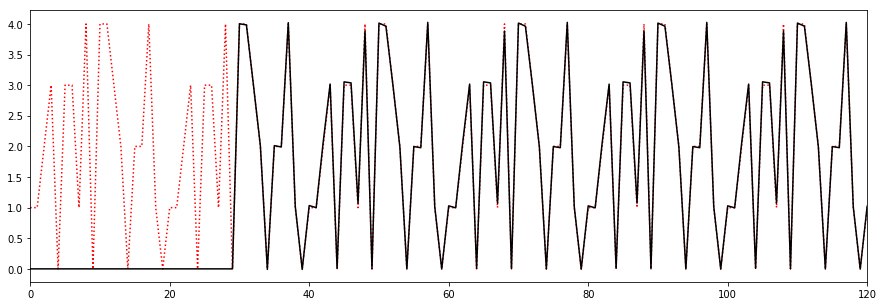

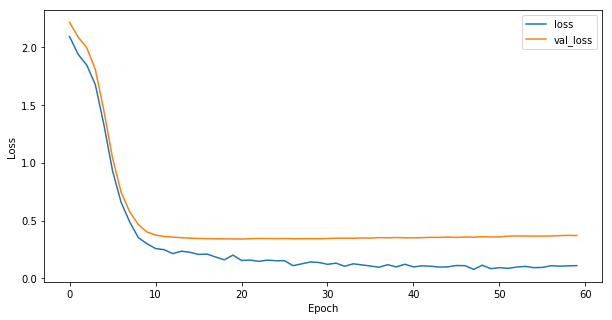

In [3]:
# _/_/_/ モデルの読み込み

mynet = MyNet(N_LAYERS, N_IN, N_HIDDEN, N_OUT)
serializers.load_npz('chainer_mynet_dropout={}.npz'.format(DROPOUT), mynet)

# _/_/_/ データの作成

dataset = DatasetMaker.make(TOTAL_SIZE, VALUE)
print(dataset.shape)
# _/_/_/ 予測

output_seq = predict(mynet, dataset, SEQUENCE_SIZE)

# # _/_/_/ 視覚化

# # 予測した時系列データ
plt.figure(figsize=(15, 5))
plt.xlim([0, PLOT_SIZE])
plt.plot(dataset, linestyle='dotted', color='red')
plt.plot(output_seq, color='black')
plt.show()

# 誤差とエポックの間の関係
losses = _pickle.load(open('./chainer_losses_dropout={}.pkl'.format(DROPOUT), 'rb'))
val_losses = _pickle.load(open('./chainer_val_losses_dropout={}.pkl'.format(DROPOUT), 'rb'))
plt.figure(figsize=(10, 5))
plt.plot(losses, label='loss')
plt.plot(val_losses, label='val_loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
